In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Read the dataset
df= pd.read_csv("/content/divisions daily weather.csv")
print(f'Shape of concatenated data  is: {df.shape}')

Shape of concatenated data  is: (30000, 43)


In [54]:
df.head()

,cloudcover,conditions,Year,Quarter,Month,Day,DayType,description,dew,Division,...,Month.2,Day.2,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,0.0,Clear,2013,Qtr 1,January,1,No rain,Clear conditions throughout the day.,50.9,Sylhet,...,January,1,60.8,73.8,47.4,6,1.6,208.4,NaN,6.0
1,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,13.6,Chittagong,...,January,2,18.3,24.0,11.9,7,4.2,323.1,NaN,18.4
2,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,53.0,Sylhet,...,January,2,62.9,75.6,50.8,7,1.9,203.8,NaN,7.2
3,0.0,Clear,2013,Qtr 1,January,3,No rain,Clear conditions throughout the day.,42.0,Naryanganj,...,January,3,60.9,78.9,48.5,7,2.5,10.2,NaN,9.8
4,0.0,Clear,2013,Qtr 1,January,4,No rain,Clear conditions throughout the day.,36.3,Naryanganj,...,January,4,60.1,81.8,46.3,7,2.5,12.7,NaN,8.5


In [17]:
df.set_index(df.columns[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30000 entries, 0.0 to 99.2
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   conditions        30000 non-null  object 
 1   Year              30000 non-null  int64  
 2   Quarter           30000 non-null  object 
 3   Month             30000 non-null  object 
 4   Day               30000 non-null  int64  
 5   DayType           30000 non-null  object 
 6   description       26932 non-null  object 
 7   dew               30000 non-null  float64
 8   Division          30000 non-null  object 
 9   feelslike         30000 non-null  float64
 10  feelslikemax      30000 non-null  float64
 11  feelslikemin      30000 non-null  float64
 12  Flood             30000 non-null  bool   
 13  humidity          30000 non-null  float64
 14  moonphase         30000 non-null  float64
 15  precip            30000 non-null  float64
 16  precipcover       30000 non-null  flo

In [35]:
round(df.isnull().sum() / len(df) * 100, 2)

conditions           0.00
Year                 0.00
Quarter              0.00
Month                0.00
Day                  0.00
DayType              0.00
description          9.23
dew                  0.00
Division             0.00
feelslike            0.00
feelslikemax         0.00
feelslikemin         0.00
Flood                0.00
humidity             0.00
moonphase            0.00
precip               0.00
precipcover          0.00
precipprob           0.00
preciptype          47.69
sealevelpressure    15.38
Season               0.00
solarenergy          0.00
solarradiation       0.00
stations             9.23
Year.1               0.00
Quarter.1            0.00
Month.1              0.00
Day.1                0.00
Year.2               0.00
Quarter.2            0.00
Month.2              0.00
Day.2                0.00
temp                 0.00
tempmax              0.00
tempmin              0.00
uvindex              0.00
visibility          15.38
winddir              0.00
windspeed   

In [38]:
skewness_values = df[[ 'description', 'preciptype', 'sealevelpressure','stations','visibility']].skew()
skewness_values

sealevelpressure   -1.242527
visibility          2.772728
dtype: float64

In [39]:
columns_with_null = [ 'description', 'preciptype', 'sealevelpressure','stations','visibility']

df[columns_with_null] = df[columns_with_null].fillna(df[columns_with_null].median())
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,65.0,2018.123077,3.154895,2013.0,2015.00,2018.000,2021.00,2023.00
Day,65.0,11.430769,9.067403,1.0,4.00,10.000,17.00,31.00
dew,65.0,25.823077,17.627976,5.7,13.10,16.800,40.80,75.60
feelslike,65.0,34.110769,19.983682,13.9,19.50,21.700,57.80,79.20
feelslikemax,65.0,41.813846,22.744696,21.6,25.40,27.000,69.00,89.50
feelslikemin,65.0,27.524615,17.865146,5.4,14.60,18.300,40.40,72.80
humidity,65.0,71.381538,12.831198,33.1,65.50,72.900,81.30,93.10
moonphase,65.0,0.447692,0.277977,0.0,0.25,0.400,0.65,0.97
precip,65.0,5.797569,24.067904,0.0,0.00,0.004,0.40,179.00
precipcover,65.0,17.564308,29.914712,0.0,0.00,4.170,16.67,100.00


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 5160 to 29998
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloudcover        30000 non-null  float64
 1   conditions        30000 non-null  object 
 2   Year              30000 non-null  int64  
 3   Quarter           30000 non-null  object 
 4   Month             30000 non-null  object 
 5   Day               30000 non-null  int64  
 6   DayType           30000 non-null  object 
 7   description       26932 non-null  object 
 8   dew               30000 non-null  float64
 9   Division          30000 non-null  object 
 10  feelslike         30000 non-null  float64
 11  feelslikemax      30000 non-null  float64
 12  feelslikemin      30000 non-null  float64
 13  Flood             30000 non-null  bool   
 14  humidity          30000 non-null  float64
 15  moonphase         30000 non-null  float64
 16  precip            30000 non-null  flo

In [65]:
for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print(df[column].nunique())
    print()
    print("="*45)

Value counts for conditions:
Rain, Partially cloudy    13136
Clear                      7555
Partially cloudy           5570
Rain, Overcast             2622
Rain                       1084
Overcast                     32
Rain, Fog                     1
Name: conditions, dtype: int64
7

Value counts for Quarter:
Qtr 3    7728
Qtr 2    7613
Qtr 1    7576
Qtr 4    7083
Name: Quarter, dtype: int64
4

Value counts for Month:
January      2604
July         2604
March        2604
August       2586
May          2573
September    2538
April        2520
June         2520
December     2387
October      2386
February     2368
November     2310
Name: Month, dtype: int64
12

Value counts for DayType:
Rainy day    16843
No rain      13157
Name: DayType, dtype: int64
2

Value counts for description:
Partly cloudy throughout the day with a chance of rain throughout the day.       6927
Clear conditions throughout the day.                                             6741
Partly cloudy throughout the day.

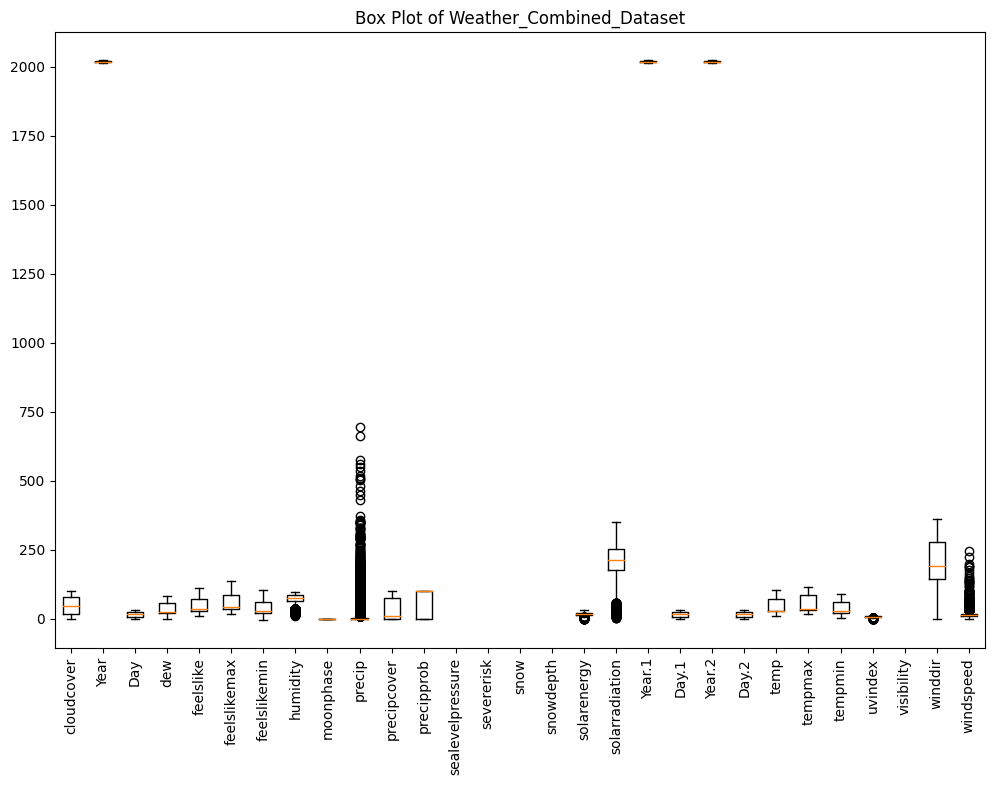

In [66]:
numeric_columns =df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
plt.boxplot(numeric_columns.values, labels=numeric_columns.columns)
plt.title("Box Plot of Weather_Combined_Dataset")
plt.xticks(rotation=90)
plt.show()

In [28]:
#Univariate Analysis - Histogram Plots

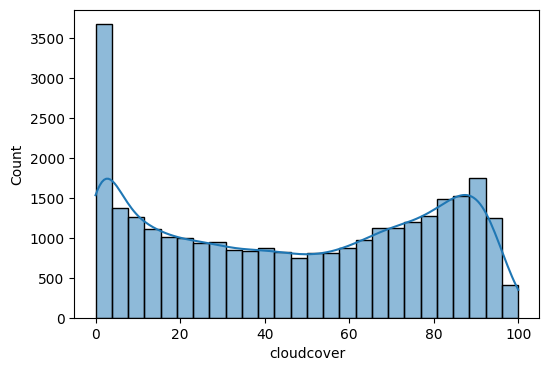

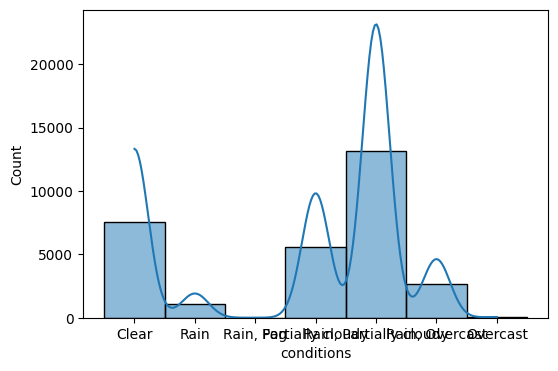

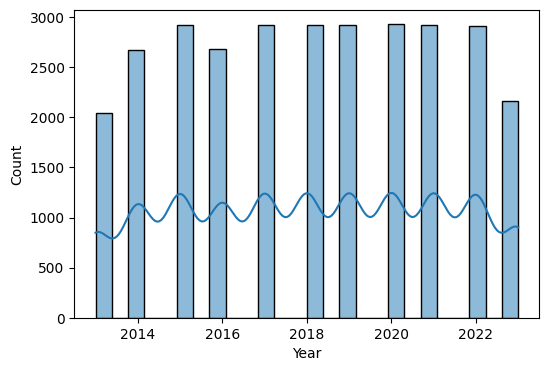

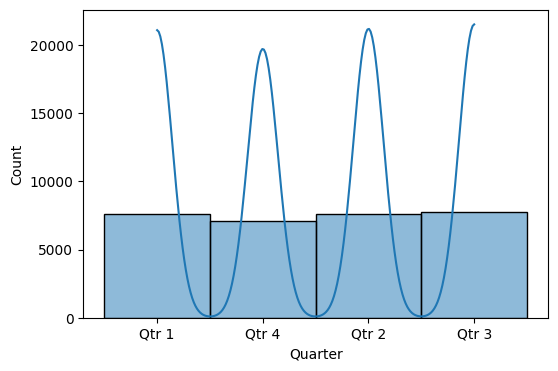

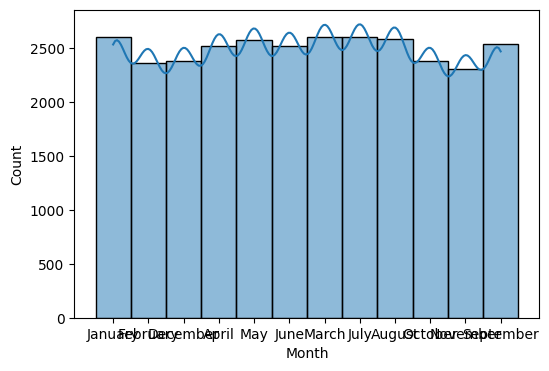

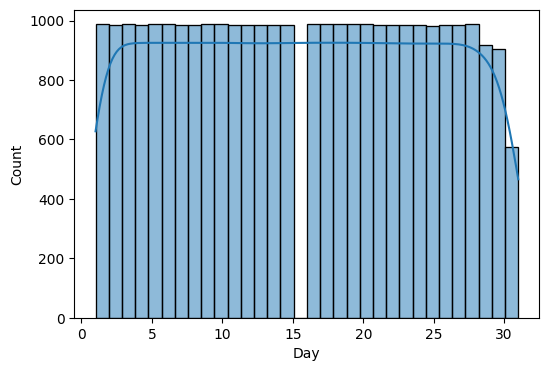

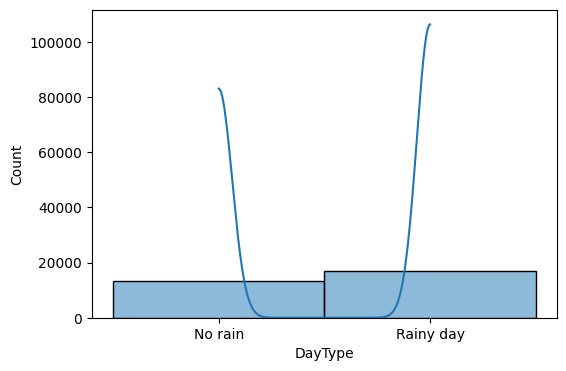

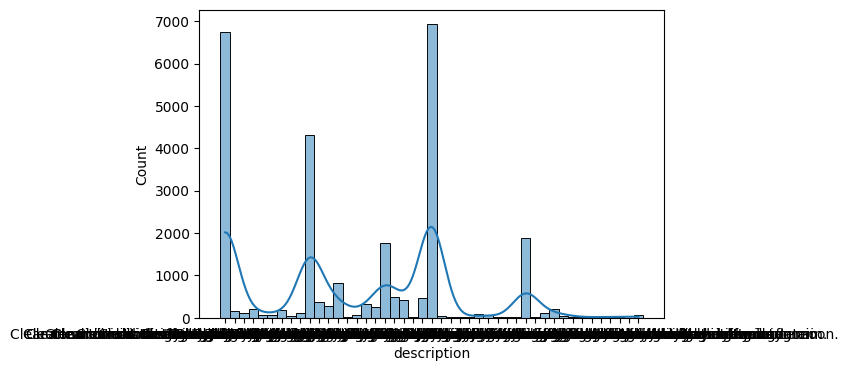

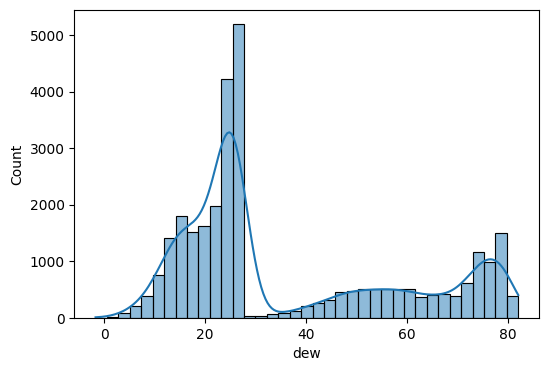

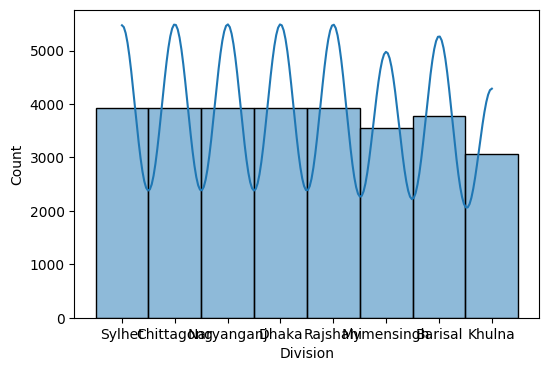

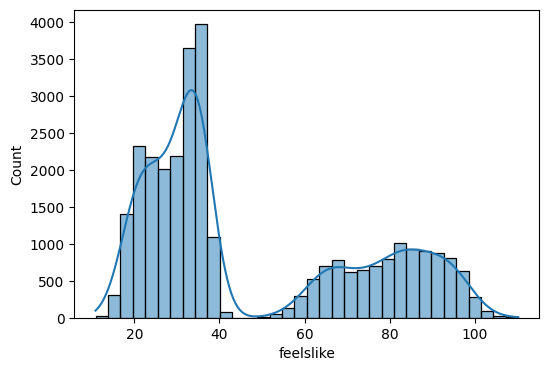

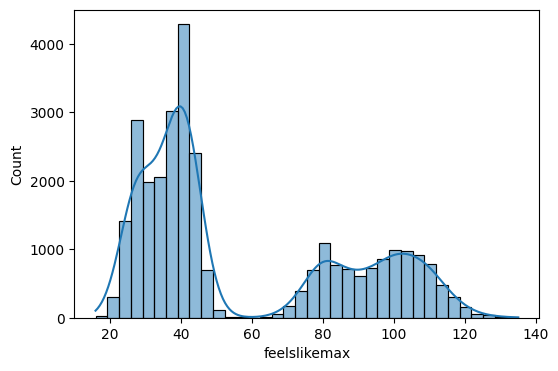

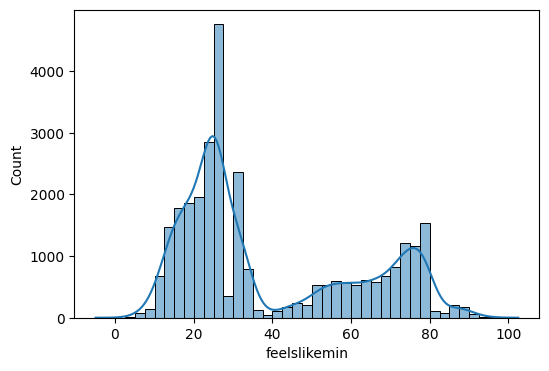

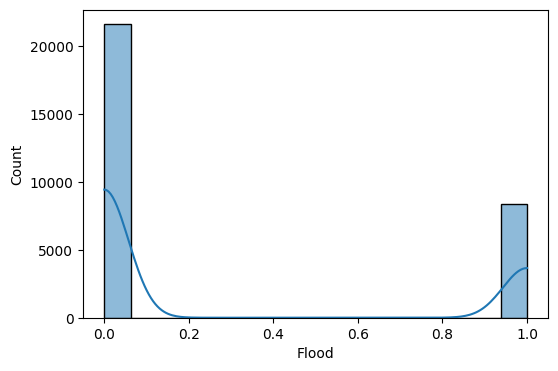

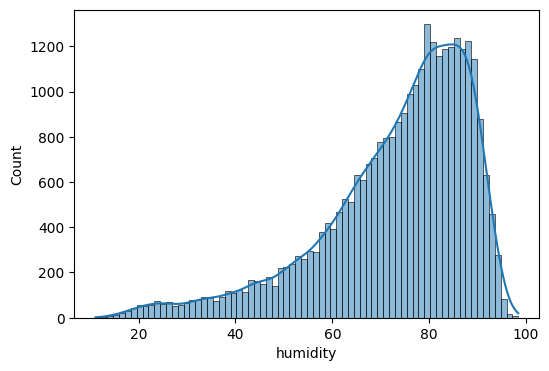

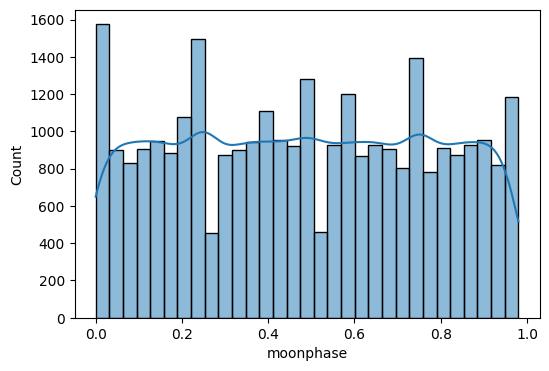

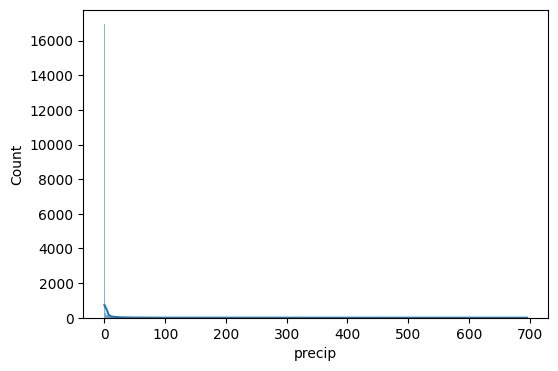

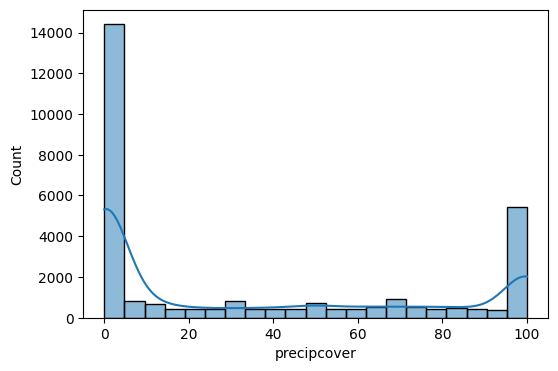

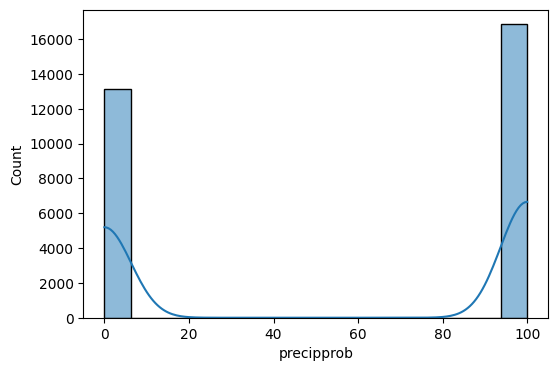

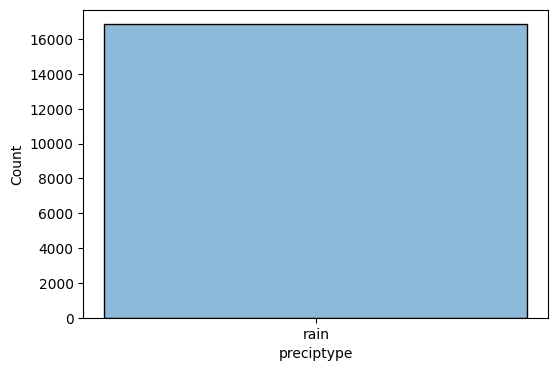

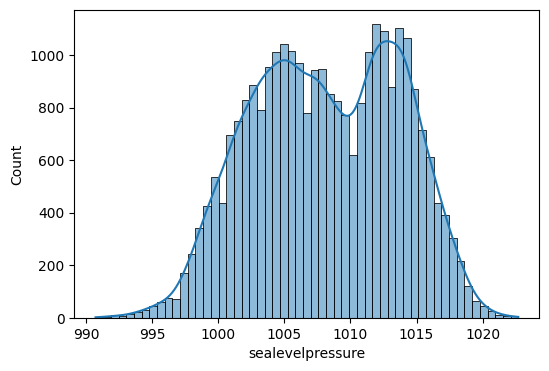

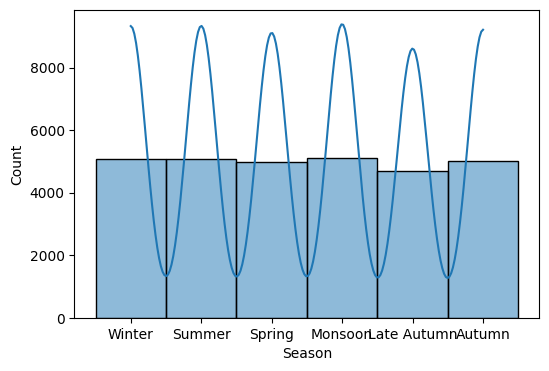

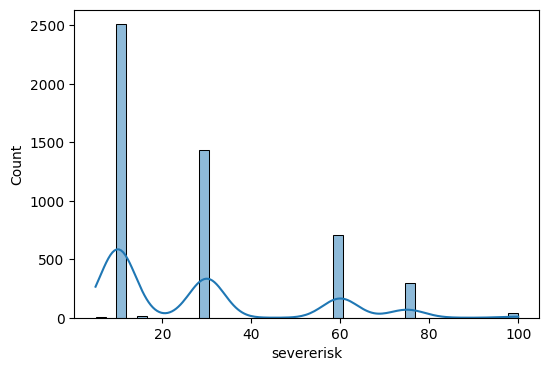

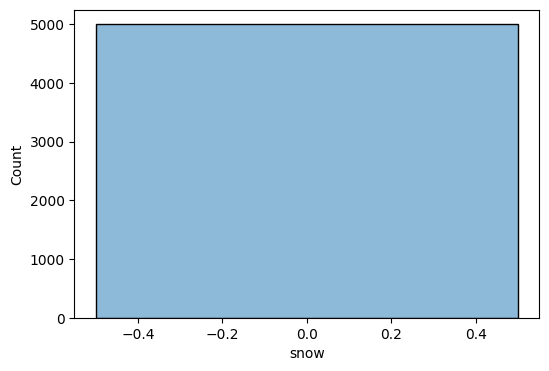

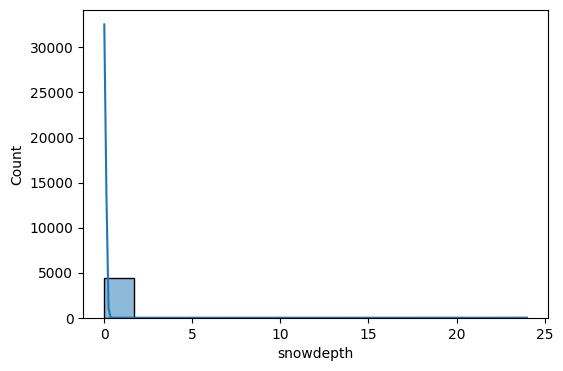

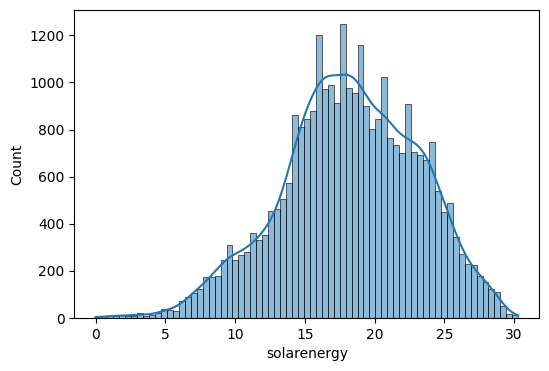

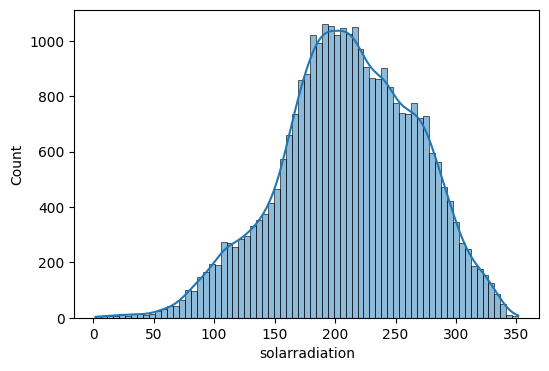

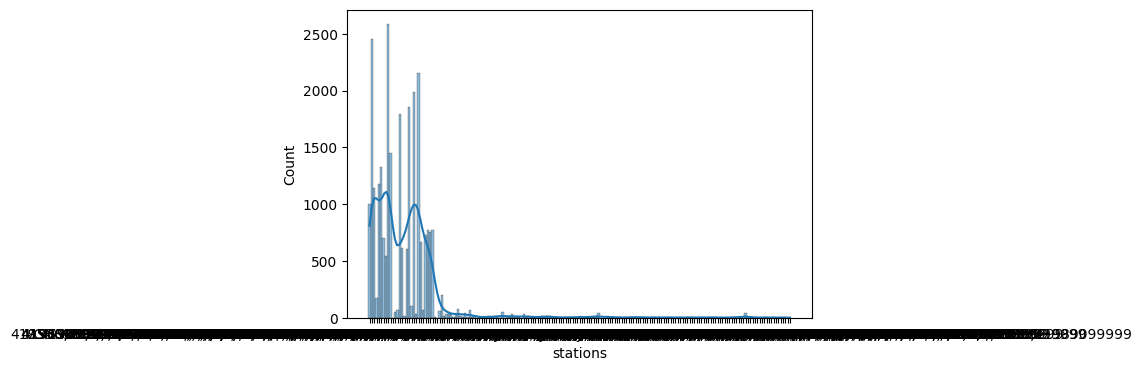

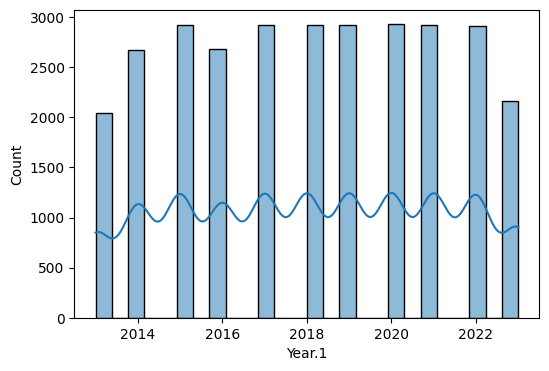

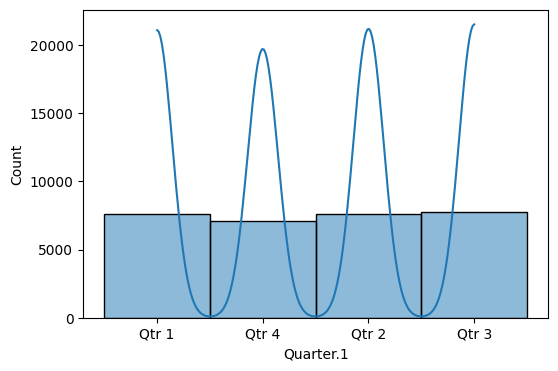

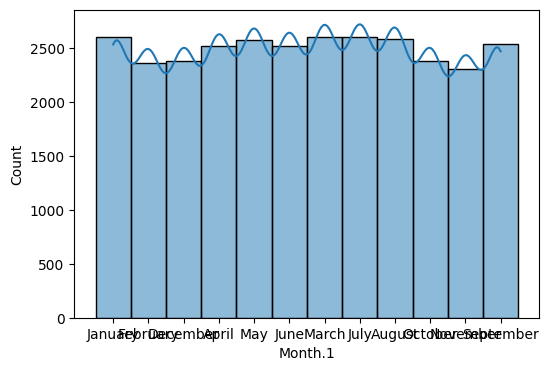

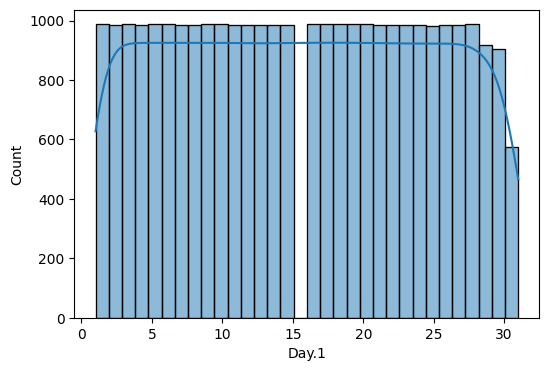

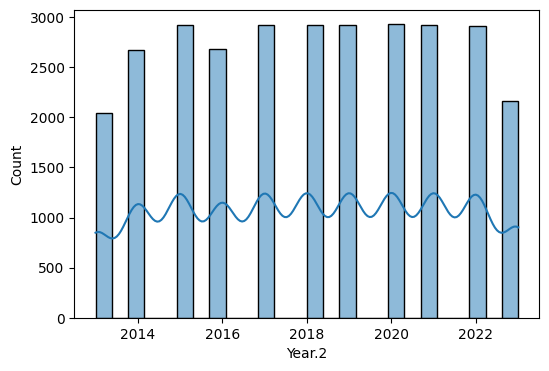

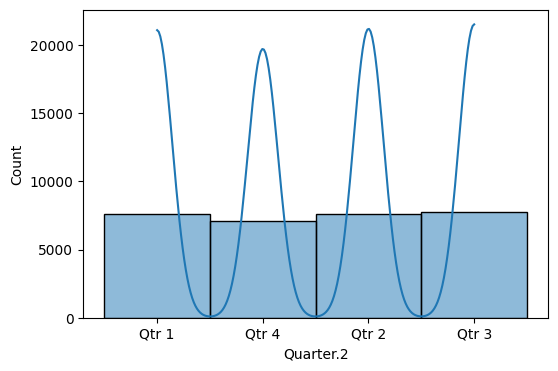

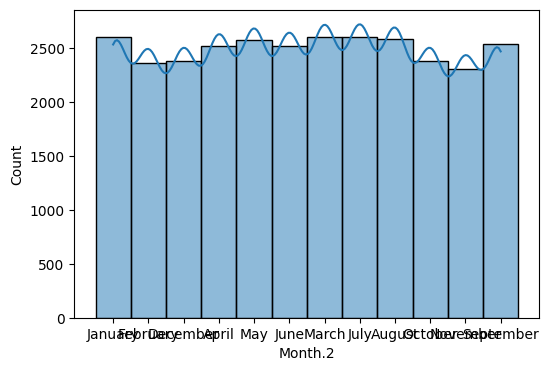

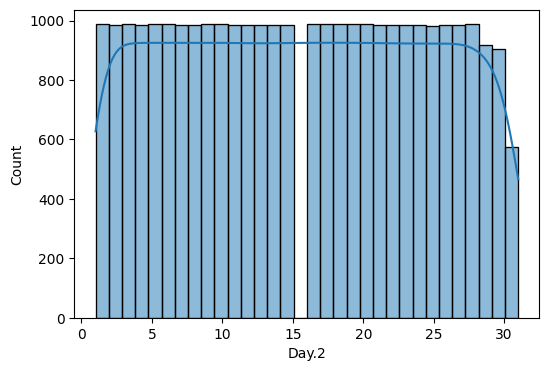

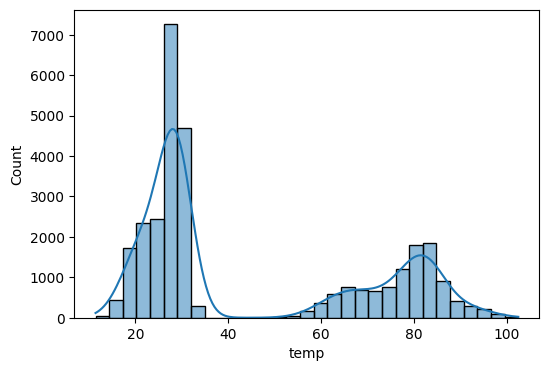

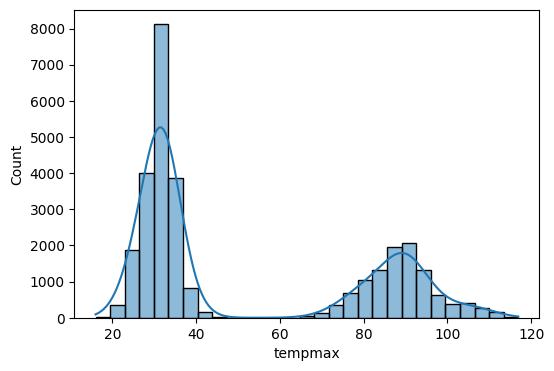

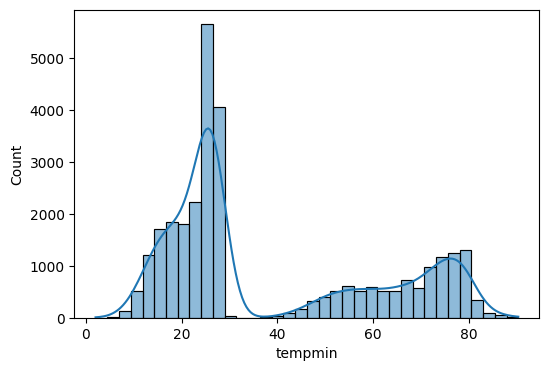

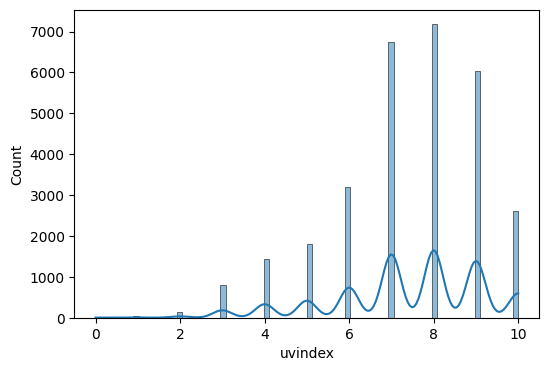

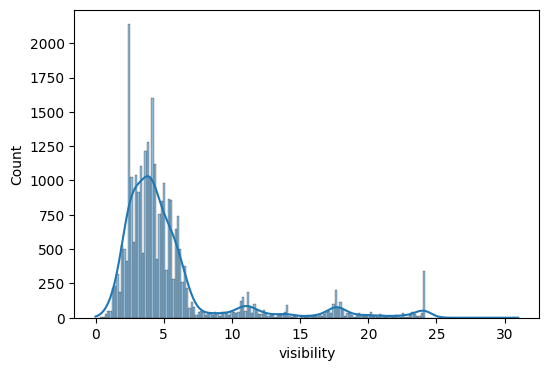

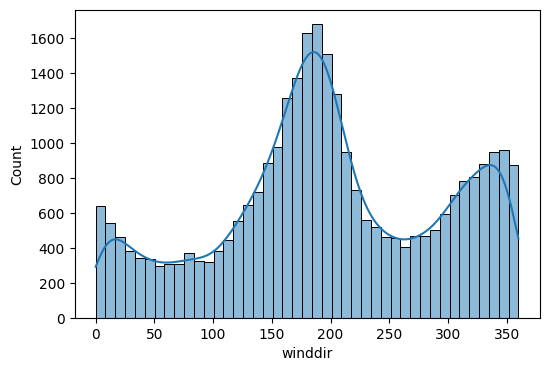

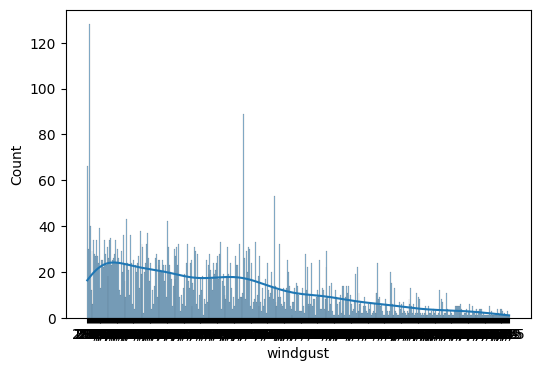

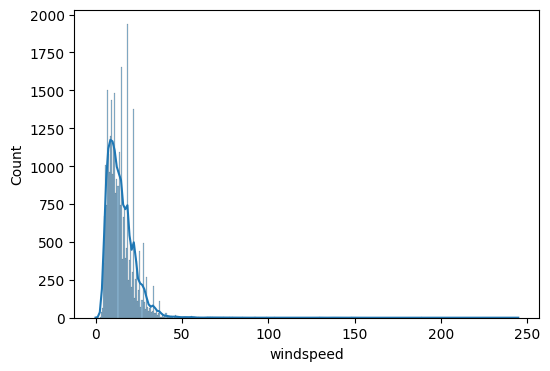

In [59]:
for i in df.columns:
    plt.figure(figsize = (6,4))
    sns.histplot(df[i], kde=True)
    plt.xlabel(i)
    plt.show()

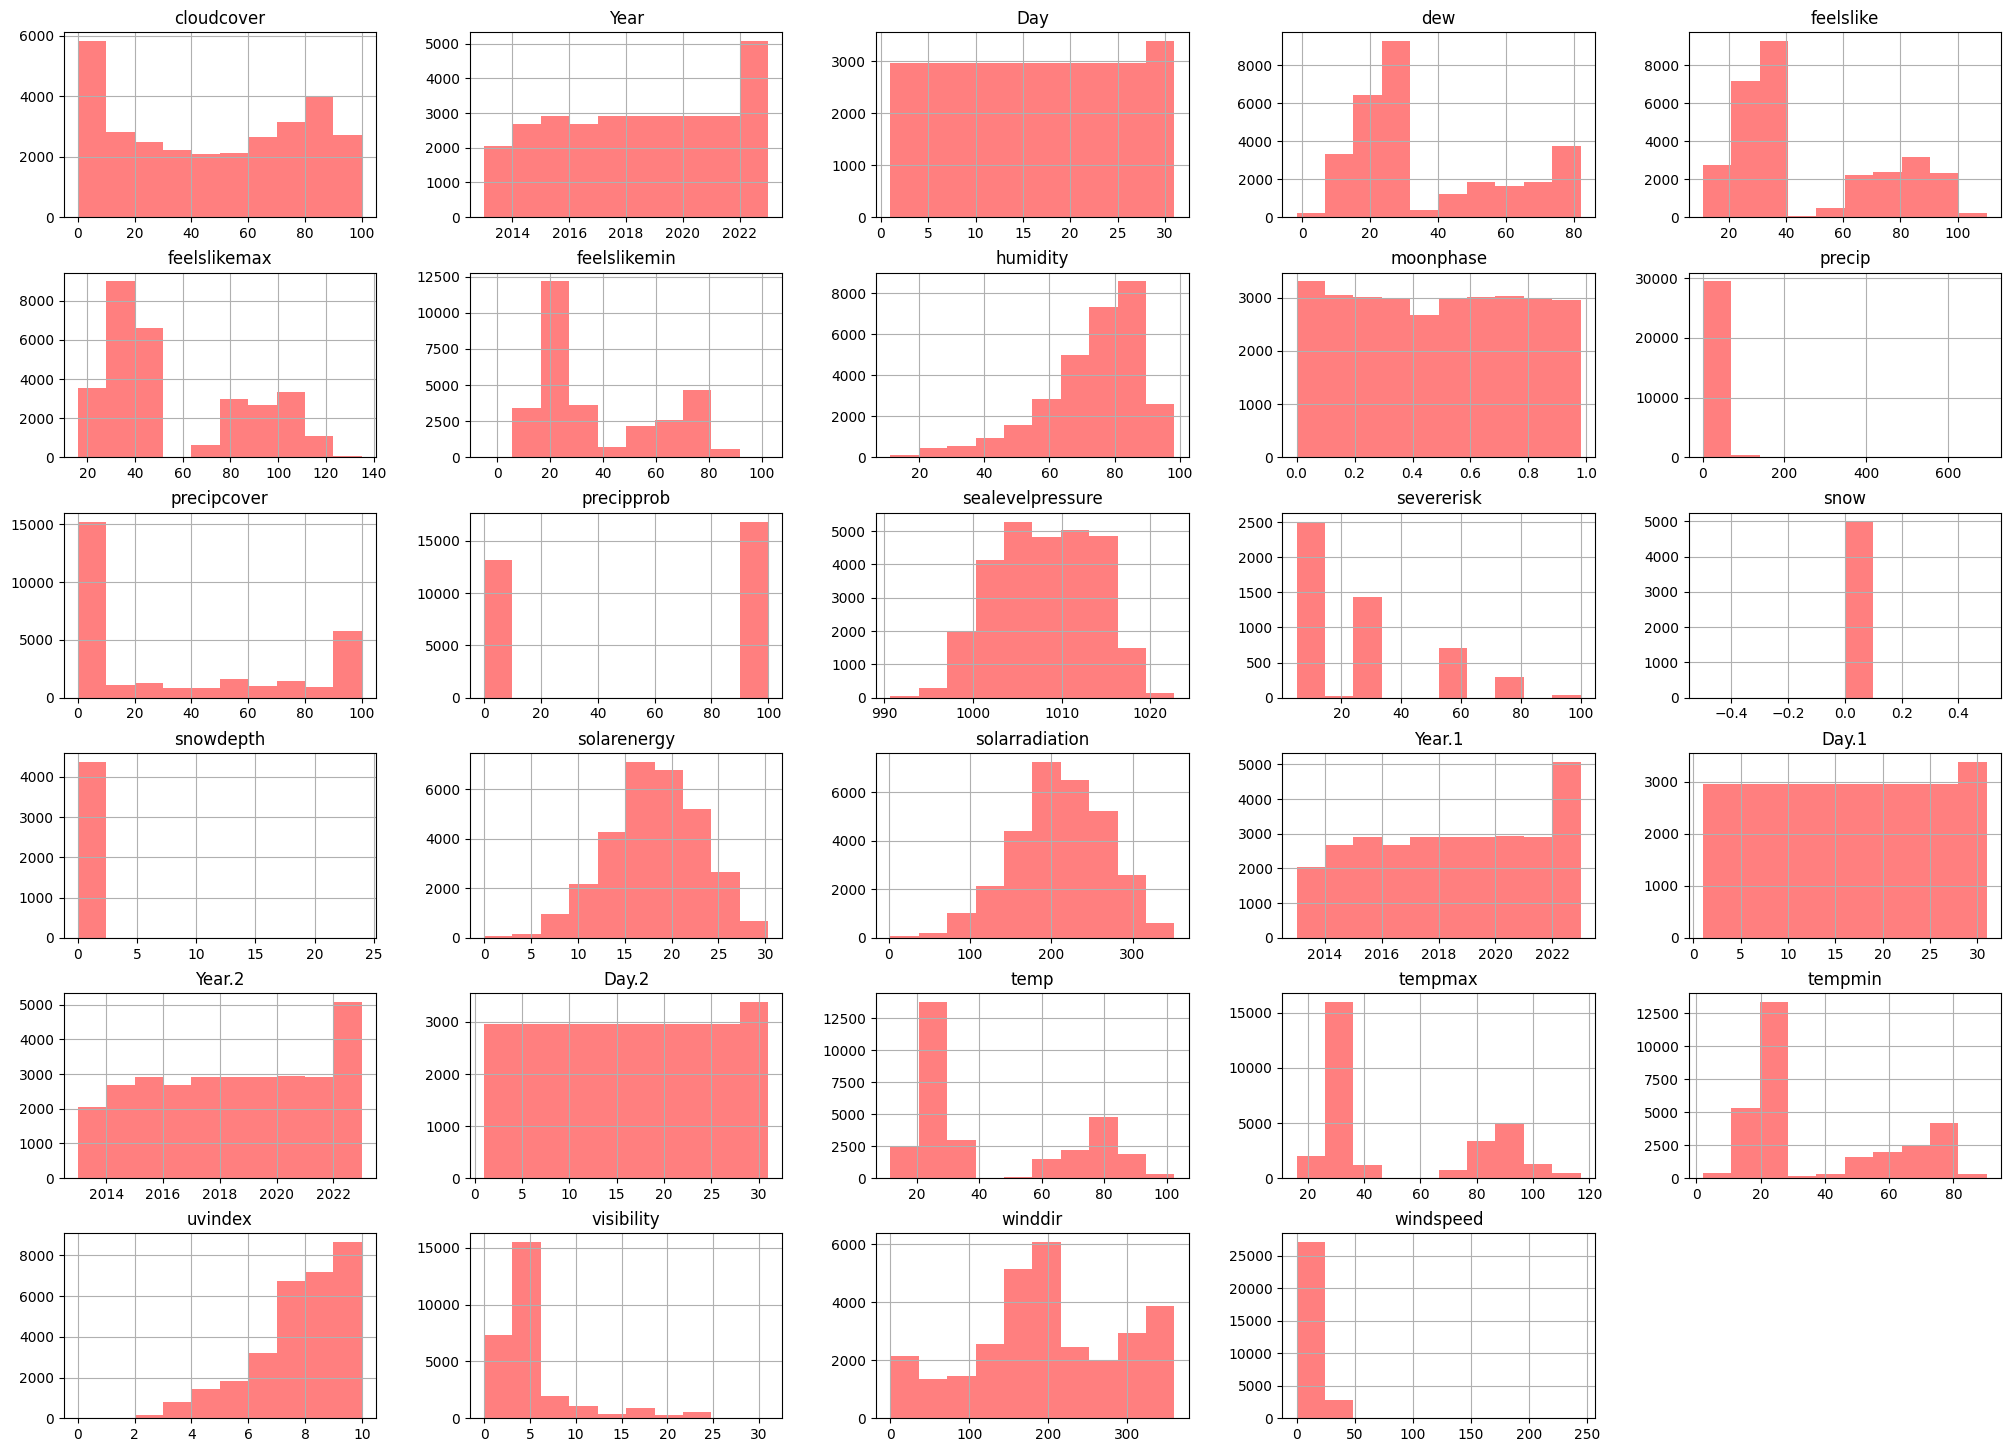

In [58]:
df.hist( color='r', figsize=(25,18), alpha=0.5)
plt.show()

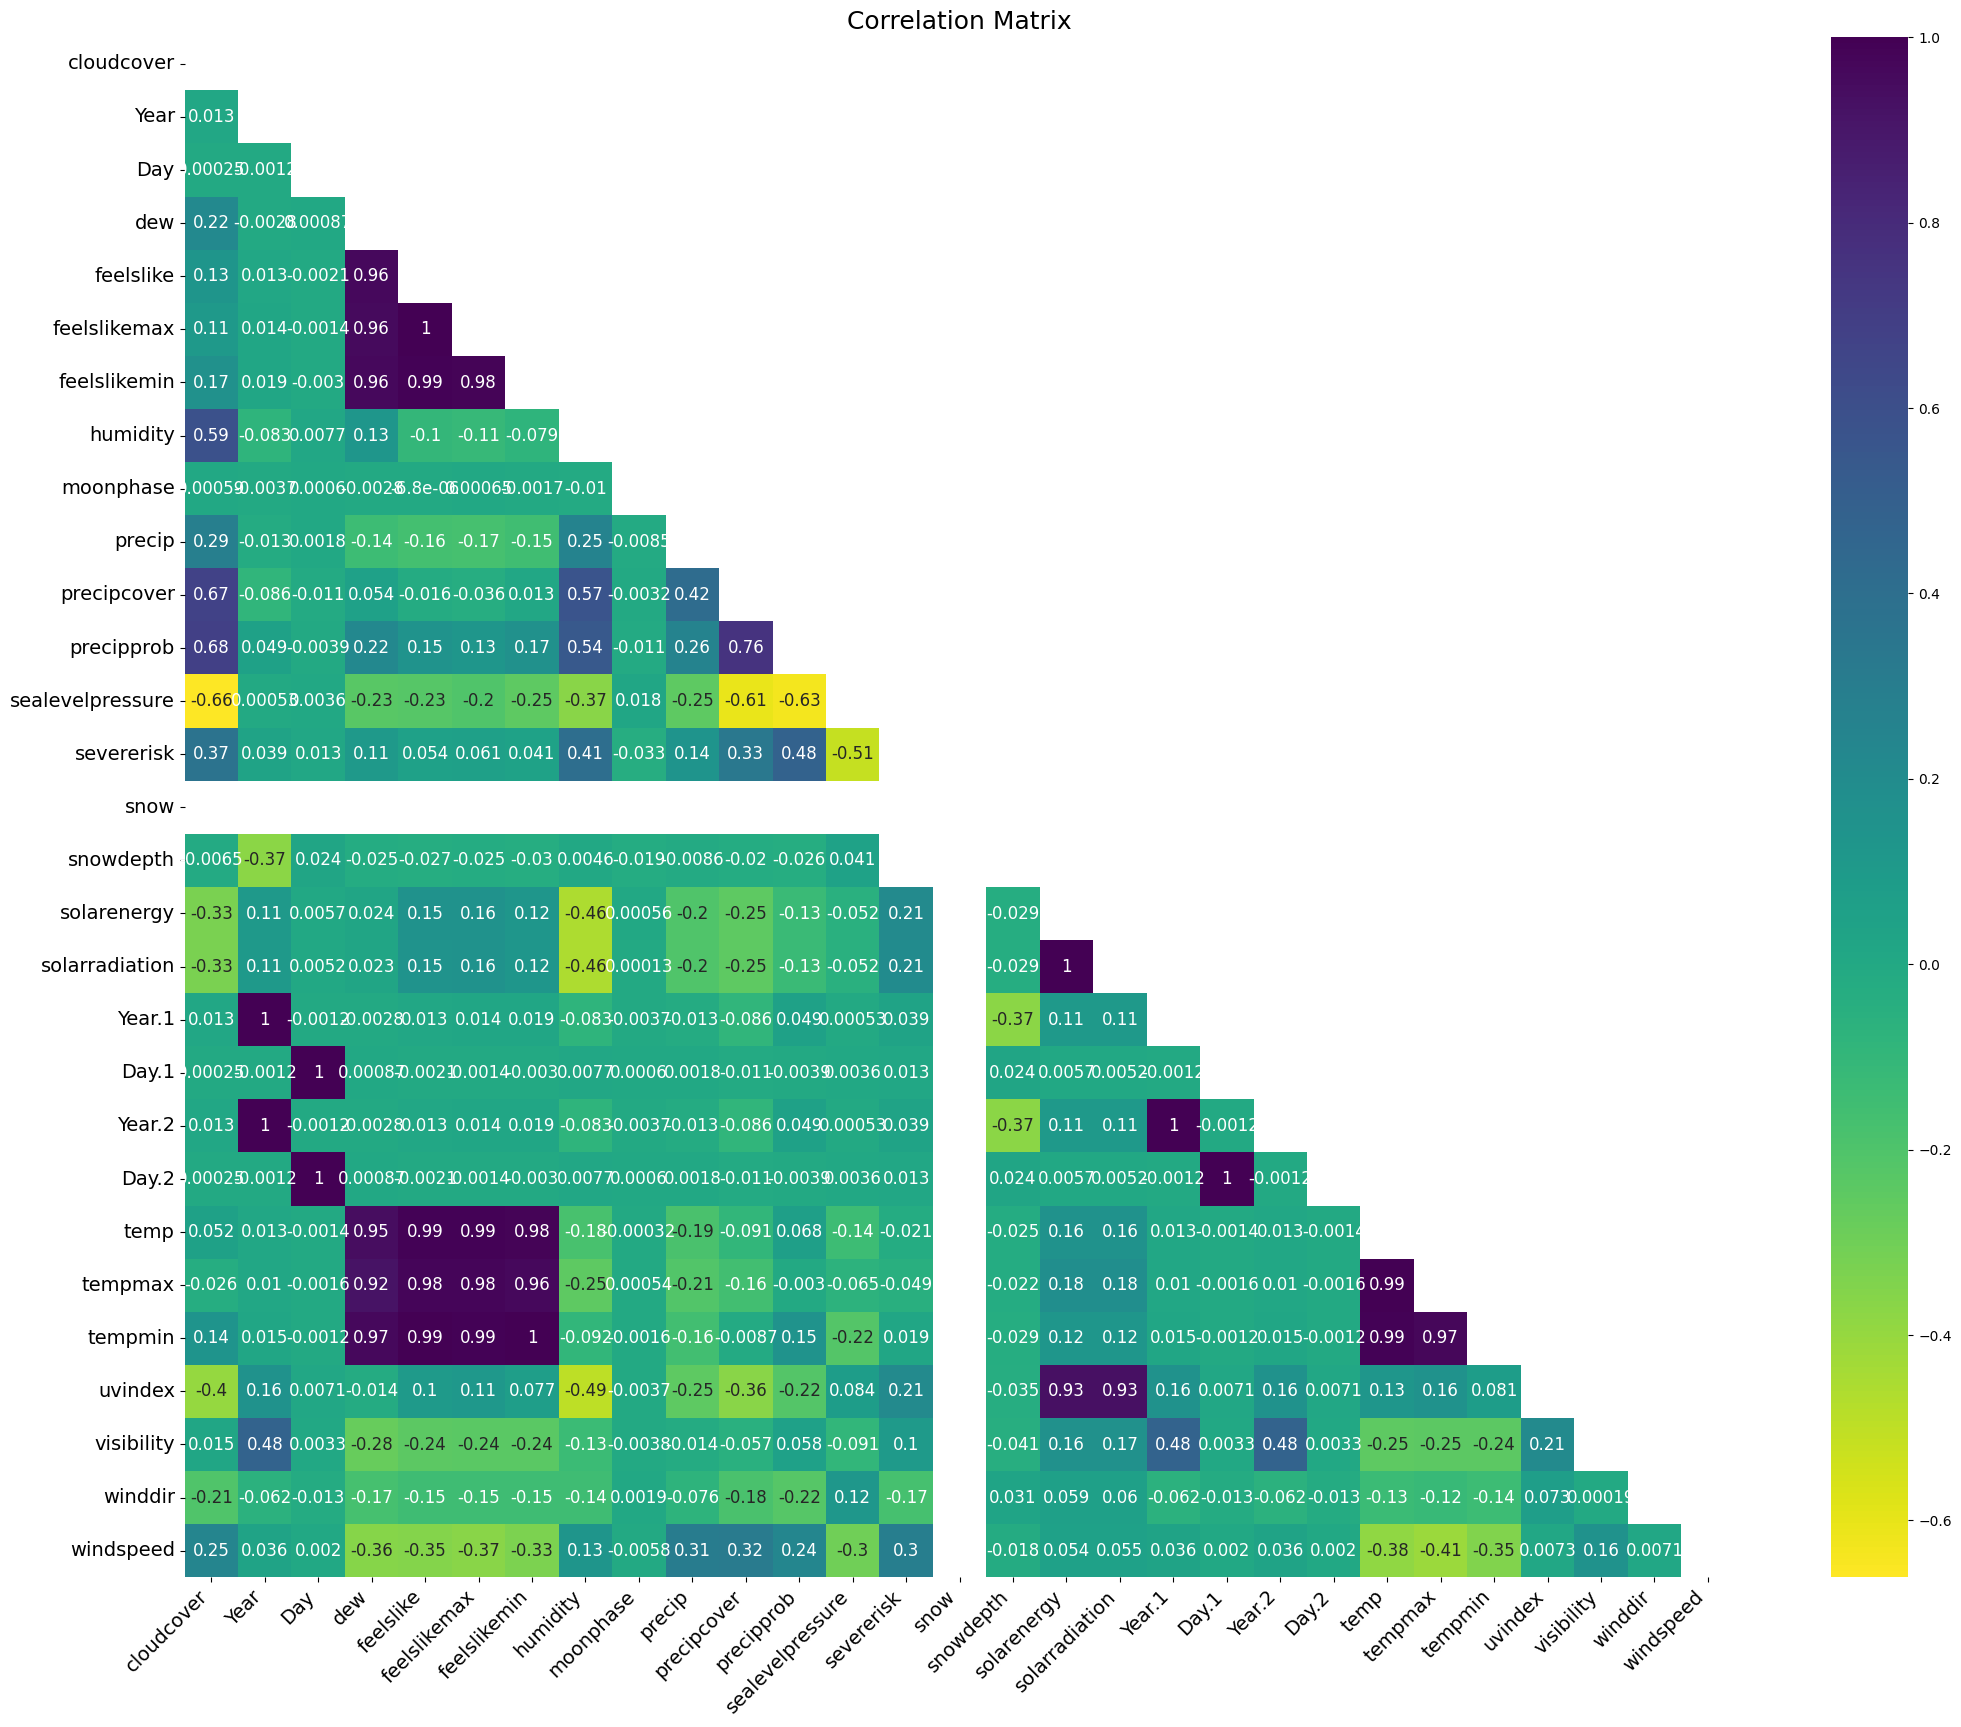

In [106]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(25, 20))
mask = np.triu(corr_matrix)
sns_plot = sns.heatmap(corr_matrix, annot=True, cmap='viridis_r', annot_kws={"size": 12}, mask=mask)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), rotation=0, verticalalignment='center', fontsize=14)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [125]:
average_river_discharge_month_year = df.groupby(["Year", "Month"])[["cloudcover"]].mean().reset_index()
max_average_river_discharge=average_river_discharge_month_year.loc[average_river_discharge_month_year.groupby('Month')['cloudcover'].idxmax(), ['Month', 'Year',  "cloudcover"]]
max_average_river_discharge

,Month,Year,cloudcover
24,April,2015,45.831250
121,August,2023,85.993103
50,December,2017,30.576613
63,February,2018,27.381696
112,January,2022,29.845968
41,July,2016,87.164977
114,June,2022,81.070417
126,March,2023,40.513710
8,May,2013,59.997419
105,November,2021,34.804583


from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['cloudcover'].plot(kind='hist', bins=20, title='cloudcover')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='index', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Year', y='cloudcover', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['cloudcover']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('cloudcover')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['cloudcover'].plot(kind='line', figsize=(8, 4), title='cloudcover')
plt.gca().spines[['top', 'right']].set_visible(False)